# Project Overview

For this project, I interpreted data from the National Parks Service about endangered species in different parks.

The data was provided by Codecademy as part of the Data Scientist: Data Analytics Specialist Career Path as a Portfolio Project at the end of the Data Scientsit Foundations portion of the course. I performed some data analysis on the conservation statuses of these species and investigated if there are any patterns or themes to the types of species that become endangered. During this project, I analyzed, cleaned up, and plotted data as well as posed questions and sought to answer them in a meaningful way.

# Project Objectives

- Complete a project to add to your portfolio
- Use Jupyter Notebook to communicate findings
- Run an analysis on a set of data
- Become familiar with data analysis workflow

# About the Data

Codecademy provided two CSV files with information about biodiversity in the National Parks. Information about those files is below:

- species_info.csv - contains data about different species and their conservation status
- observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.

The files have the following columns:

species_info.csv:
- category - class of animal
- scientific_name - the scientific name of each species
- common_name - the common names of each species
- conservation_status - each species’ current conservation status

observations.csv:
- scientific_name - the scientific name of each species
- park_name - Park where species were found
- observations - the number of times each species was observed at park

In [103]:
# load libraries that will be helpful in exploring and analyzing the data
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2_contingency


In [10]:
## Save CSV files as pandas dfs and view first five rows
observations = pd.read_csv("observations.csv")

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [11]:
## Save CSV files as pandas dfs and view first five rows
species_info = pd.read_csv("species_info.csv")

species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [15]:
# starting exploration of data by looking at summary statistics
observations.describe(include = 'all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [14]:
species_info.describe(include = 'all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


# Exploratory Data Analysis

With the data now loaded, my next step is to explore and become acquainted with the data. After loading the data above, I looked at the first five rows of the data and some of the summary statistics to get an idea of the size and type of data. I will build on that information by looking at additional summary statistics and visually examining my data.

Initial questions I have to start the exploration include the following:

- What is the distribution of conservation_status for animals?
- Are certain types of species more likely to be in an intervention status?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

In [16]:
species_info.conservation_status.value_counts(dropna = False)

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

Looking further into the cause of the large number of NaN instances in the conservation status found these details:

Definition: 'conservation_status - each species’ current conservation status' 

From there investigated the status of some of the NaN instances:

- American Bison - Near Threatened
- Gapper's Red-Backed Vole - Not Threatened
- Aurochs, Aurochs, Domestic Cattle (Feral) - Not Threatened
- Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)	- Not Threatened
- Wapiti Or Elk	- Not Threatened

This would indicate that those that are listed in NaN status are species that are not currently under a conservation status or that no current intervention is taking place for these species.

This would answer our first exploratory question: "What is the distribution of conservation_status for animals?"

The answer would be that 191 species currently have a conservation status in these four parks while the vast majority, 5,633, do not have a conservation status.

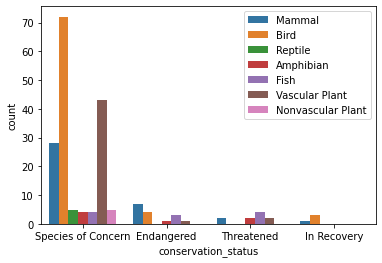

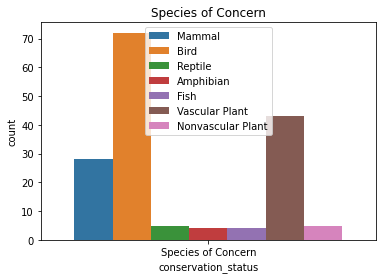

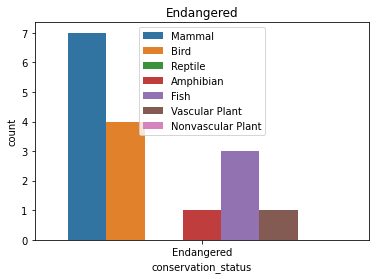

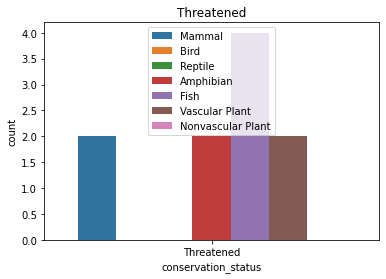

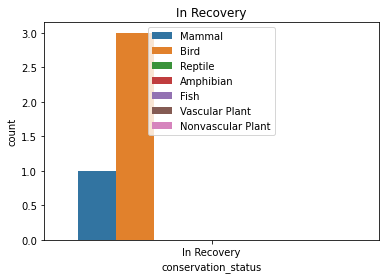

<Figure size 432x288 with 0 Axes>

In [57]:
sns.countplot(data = species_info, x = 'conservation_status', hue = 'category')
plt.legend(loc = 'upper right')
plt.show()
plt.clf()


for status in species_info.conservation_status.unique():
    if status is species_info.conservation_status.unique()[0]:
        continue
    else:
        sns.countplot(data = species_info, x = species_info.conservation_status[species_info.conservation_status == status], hue = 'category')
        plt.title(status)
        plt.legend(loc = 'upper center')
        plt.show()
        plt.clf()
        
# will need to fix the legend by plotting the specific countplot if presenting the information, but for my internal exploration iterating through the list was more efficient


In [68]:
print('Full Count')
print(species_info.category.value_counts())
for status in species_info.conservation_status.unique():  
    print(status)
    print(species_info.category[species_info.conservation_status == status].value_counts())

Full Count
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64
nan
Series([], Name: category, dtype: int64)
Species of Concern
Bird                 72
Vascular Plant       43
Mammal               28
Reptile               5
Nonvascular Plant     5
Amphibian             4
Fish                  4
Name: category, dtype: int64
Endangered
Mammal            7
Bird              4
Fish              3
Vascular Plant    1
Amphibian         1
Name: category, dtype: int64
Threatened
Fish              4
Mammal            2
Vascular Plant    2
Amphibian         2
Name: category, dtype: int64
In Recovery
Bird      3
Mammal    1
Name: category, dtype: int64


In [76]:
species_info.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [77]:
categories = ['Vascular Plant', 'Bird', 'Nonvascular Plant', 'Mammal', 'Fish', 'Amphibian', 'Reptile']
statuses = ['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
vascular_plant = [43, 1, 2, 0]
bird = [72, 4, 0, 3]
nonvascular_plant = [5, 0, 0, 0]
mammal = [28, 7, 2, 1]
fish = [4, 3, 4, 0]
amphibian = [4, 1, 2, 0]
reptile = [5, 0, 0, 0]

species_of_concern = [43, 72, 5, 28, 4, 4, 5]
endangered = [1, 4, 0, 7, 3, 1, 0]
threatened = [2, 0, 0, 2, 4, 2, 0]
in_recovery = [0, 3, 0, 1, 0, 0, 0]

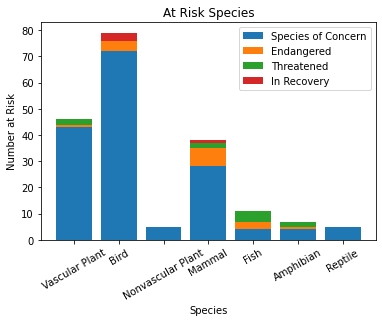

In [82]:
# create bottoms for the stacked bar
threatened_bottom = np.add(species_of_concern, endangered)
in_recovery_bottom = np.add(threatened_bottom, threatened)

# create plot here
xaxis = range(len(species_of_concern))
plt.bar(xaxis, species_of_concern)
plt.bar(xaxis, endangered, bottom = species_of_concern)
plt.bar(xaxis, threatened, bottom = threatened_bottom)
plt.bar(xaxis, in_recovery, bottom = in_recovery_bottom)
plt.xticks(rotation = 30)
ax = plt.subplot()
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
plt.title('At Risk Species')
plt.xlabel('Species')
plt.ylabel('Number at Risk')
plt.legend(statuses)
plt.show()

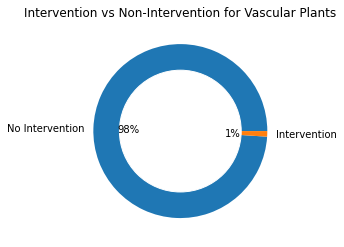

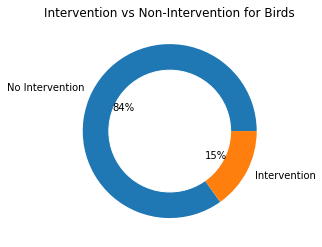

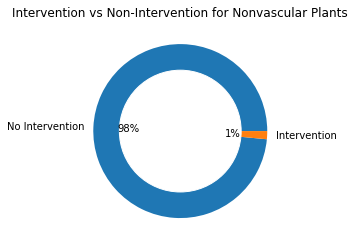

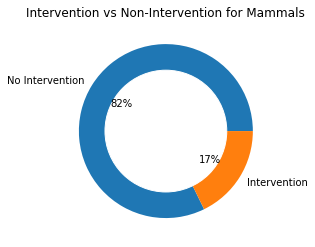

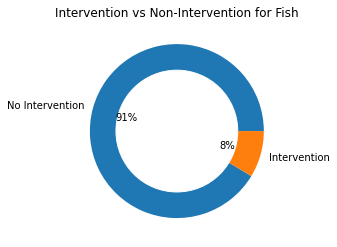

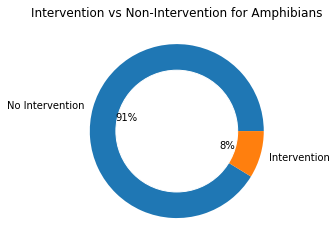

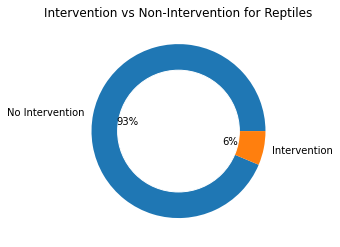

<Figure size 432x288 with 0 Axes>

In [102]:
statuses_wn = ['No Intervention', 'Intervention']
vascular_plant_wn = [4424, 46]
bird_wn = [442, 79]
nonvascular_plant_wn = [328, 5]
mammal_wn = [176, 38]
fish_wn = [116, 11]
amphibian_wn = [73, 7]
reptile_wn = [74, 5]


# Create a pieplot
plt.pie(vascular_plant_wn, labels = statuses_wn, autopct = '%0.1d%%')
plt.title('Intervention vs Non-Intervention for Vascular Plants')

# add a circle at the center to transform it into a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.clf()

# Create a pieplot
plt.pie(bird_wn, labels = statuses_wn, autopct = '%0.1d%%')
plt.title('Intervention vs Non-Intervention for Birds')

# add a circle at the center to transform it into a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.clf()

# Create a pieplot
plt.pie(nonvascular_plant_wn, labels = statuses_wn, autopct = '%0.1d%%')
plt.title('Intervention vs Non-Intervention for Nonvascular Plants')

# add a circle at the center to transform it into a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.clf()

# Create a pieplot
plt.pie(mammal_wn, labels = statuses_wn, autopct = '%0.1d%%')
plt.title('Intervention vs Non-Intervention for Mammals')

# add a circle at the center to transform it into a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.clf()

# Create a pieplot
plt.pie(fish_wn, labels = statuses_wn, autopct = '%0.1d%%')
plt.title('Intervention vs Non-Intervention for Fish')

# add a circle at the center to transform it into a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.clf()

# Create a pieplot
plt.pie(amphibian_wn, labels = statuses_wn, autopct = '%0.1d%%')
plt.title('Intervention vs Non-Intervention for Amphibians')

# add a circle at the center to transform it into a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.clf()

# Create a pieplot
plt.pie(reptile_wn, labels = statuses_wn, autopct = '%0.1d%%')
plt.title('Intervention vs Non-Intervention for Reptiles')

# add a circle at the center to transform it into a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.clf()




Second Question: Are certain types of species more likely to be in an intervention status?

The above value counts, bar plots, count plots and donut plots help us to answer the question regarding the likelihood of a particular species being in an intervention status.

Species Observed: 
- Vascular Plants
- Birds
- Nonvascular Plants
- Mammals
- Fish
- Amphibians
- Reptiles

Based on the value counts and bar plots, the first instinct for the species most likely to be in an intervention status would be, in order:  bird, vascular plant and then mammal. These three have the highest overall counts with 79, 46 and 38. However, as I noticed the very different totals in the total value counts, I felt it would be beneficial to additionally see the percentage of a species in intervention status.

The donut charts showed that due to the large number of vascular plants in the four parks as a whole, the number of intervention status vascular plants only made up 1% of their total. By percentage, the species with the highest likelihood of being in an intervention status would be mammal at 17%, the bird at 15% and the fish and amphibian both at 8%.

The combination the stacked bar and donut chart would point to the need to investigate the mammal and the bird more closely for why they are more likely to be in an intervention status. The mammal would be the top concern as they have both a higher proportion in intervention status along with having the highest pure count of any species in the more serious intervention statuses of endangered, threatened and in recovery.

In [110]:
mammal_bird_contingency = [[38, 176],
              [79, 442]]
chi2_contingency(mammal_bird_contingency)

(0.5810483277947567,
 0.445901703047197,
 1,
 array([[ 34.06530612, 179.93469388],
        [ 82.93469388, 438.06530612]]))

In [111]:
mammal_reptile_contingency = [[38, 176],
               [5, 74]]
chi2_contingency(mammal_reptile_contingency)

(5.139702724228909,
 0.02338465214871547,
 1,
 array([[ 31.40614334, 182.59385666],
        [ 11.59385666,  67.40614334]]))

In [112]:
reptile_bird_contingency = [[5, 74],
              [79, 442]]
chi2_contingency(reptile_bird_contingency)

(3.7429112721357165,
 0.05303196986912507,
 1,
 array([[ 11.06,  67.94],
        [ 72.94, 448.06]]))

In [113]:
nonvplants_vplants_contingency = [[5, 328],
              [46, 4424]]
chi2_contingency(nonvplants_vplants_contingency)

(0.2854762603535055,
 0.5931341408785127,
 1,
 array([[3.53591505e+00, 3.29464085e+02],
        [4.74640849e+01, 4.42253592e+03]]))

In [114]:
amphibian_reptile_contingency = [[7, 73],
              [5, 74]]
chi2_contingency(amphibian_reptile_contingency)

(0.07704707278481003,
 0.7813397425469251,
 1,
 array([[ 6.03773585, 73.96226415],
        [ 5.96226415, 73.03773585]]))

In [116]:
amphibian_fish_contingency = [[7, 73],
              [11, 116]]
chi2_contingency(amphibian_reptile_contingency)

(0.07704707278481003,
 0.7813397425469251,
 1,
 array([[ 6.03773585, 73.96226415],
        [ 5.96226415, 73.03773585]]))

Are the differences between species and their conservation status significant?

Using the chi2_contingency test, I found the p-value comparing two species at a time. Of the tests run, and with a 5% / 0.05 confidence threshold, I found that amphibian and fish, amphibian and reptile, nonvascular and vascular plants, , reptile and bird and mammal and bird all do not have a statistical significant pairing. The only found significance was the mammal and reptile with the mammal having a significantly significant higher chance of having a conservation status.

In [117]:
# find the different parks represented
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [122]:
# max at Great Smoky Mountains National Park
observations[observations.park_name == 'Great Smoky Mountains National Park'].observations.max()

147

In [124]:
# max at Yosemite National Park
observations[observations.park_name == 'Yosemite National Park'].observations.max()

223

In [125]:
# max at Bryce National Park
observations[observations.park_name == 'Bryce National Park'].observations.max()

176

In [126]:
# max at Yellowstone National Park
observations[observations.park_name == 'Yellowstone National Park'].observations.max()

321

In [129]:
observations[observations.observations == 147][observations.park_name == 'Great Smoky Mountains National Park']

C:\Users\dtta2\AppData\Local\Temp/ipykernel_19096/236560202.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  observations[observations.observations == 147][observations.park_name == 'Great Smoky Mountains National Park']


,scientific_name,park_name,observations
8840,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147


In [130]:
observations[observations.observations == 223][observations.park_name == 'Yosemite National Park']

C:\Users\dtta2\AppData\Local\Temp/ipykernel_19096/4138698019.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  observations[observations.observations == 223][observations.park_name == 'Yosemite National Park']


,scientific_name,park_name,observations
6682,Ivesia shockleyi var. shockleyi,Yosemite National Park,223


In [131]:
observations[observations.observations == 176][observations.park_name == 'Bryce National Park']

C:\Users\dtta2\AppData\Local\Temp/ipykernel_19096/3761882468.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  observations[observations.observations == 176][observations.park_name == 'Bryce National Park']


,scientific_name,park_name,observations
13138,Valerianella radiata,Bryce National Park,176


In [132]:
observations[observations.observations == 321][observations.park_name == 'Yellowstone National Park']

C:\Users\dtta2\AppData\Local\Temp/ipykernel_19096/2248113004.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  observations[observations.observations == 321][observations.park_name == 'Yellowstone National Park']


,scientific_name,park_name,observations
11281,Lycopodium tristachyum,Yellowstone National Park,321


In [135]:
# finding the common name and category for the highest observed at Great Smoky Mountain National Park
species_info[species_info.scientific_name == 'Sonchus asper ssp. asper']

,category,scientific_name,common_names,conservation_status
4840,Vascular Plant,Sonchus asper ssp. asper,Spiny Sowthistle,NaN


In [136]:
# finding the common name and category for the highest observed at Yosemite National Park
species_info[species_info.scientific_name == 'Ivesia shockleyi var. shockleyi']

,category,scientific_name,common_names,conservation_status
5728,Vascular Plant,Ivesia shockleyi var. shockleyi,"Shockley's Ivesia, Sky Mousetail",NaN


In [137]:
# finding the common name and category for the highest observed at Bryce National Park
species_info[species_info.scientific_name == 'Valerianella radiata']

,category,scientific_name,common_names,conservation_status
1228,Vascular Plant,Valerianella radiata,"Beaked Corn-Salad, Corn Salad",NaN


In [138]:
# finding the common name and category for the highest observed at Yellowstone National Park
species_info[species_info.scientific_name == 'Lycopodium tristachyum']

,category,scientific_name,common_names,conservation_status
1760,Vascular Plant,Lycopodium tristachyum,"Deep-Root Clubmoss, Ground Cedar",NaN


Which species were spotted the most at each park?

The vascular plant, Spiny Sowthistle, was the most observed species at the Great Smoky National Park.

The vascular plant, Shockley's Ivesia or Sky Mousetail, was the most observed species at the Yosemite National Park.

The vascular plant, Beaked Corn Salad, was the most observed species at the Bryce National Park.

The vascular plant, Deep-Root Clubmoss or Ground Cedar, was the most observed species at the Yellowstone National Park.

# Conclusions / Answers to Questions Posed

What is the distribution of conservation_status for animals?
- 5,633 species of animals are not in an intervention state and 191 species of animals are in an intervention state. This makes the vast majority of animals in a non-intervention state.
Are certain types of species more likely to be in an intervention status?
- Birds have the highest count in an intervention status while mammals and birds have the highest percent of their species in an intervention status.
Are the differences between species and their conservation status significant?
- There is not a significant difference for most of the species observed in the dataset. However, mammals are significantly more likely to be in a conservation status than reptiles.
Which species were spotted the most at each park?
- The study found that the Deep-Root Clubmoss, aka the Ground Cedar, was the species that was most spotted overall and at Yellowstone. The Beaked Corn Salad was most spotted at the Bryce National Park. The Shockley's Ivesia, aka Sky Mousetail, was the most spotted at the Yosemite National Park. The Spiny Sowthistle was the most observed species at the Great Smoky National Park.